<a href="https://colab.research.google.com/github/RMranaweera/E-Commerce-Web-App/blob/main/Copy_of_module_02_01_30_06_Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib tensorflow scikit-learn

In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Check uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving fer2013.csv to fer2013 (1).csv
User uploaded file "fer2013 (1).csv" with length 301072766 bytes


In [4]:
import pandas as pd

# Load the uploaded CSV file into a DataFrame
data = pd.read_csv('fer2013.csv')

# Map for emotion labels
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Count occurrences of each emotion
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']

# Map emotion labels to their corresponding names
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)

# Display the emotion counts
print(emotion_counts)


    emotion  number
0     Angry    4953
1      Fear    5121
2       Sad    6077
3   Neutral    6198
4     Happy    8989
5  Surprise    4002
6   Disgust     547


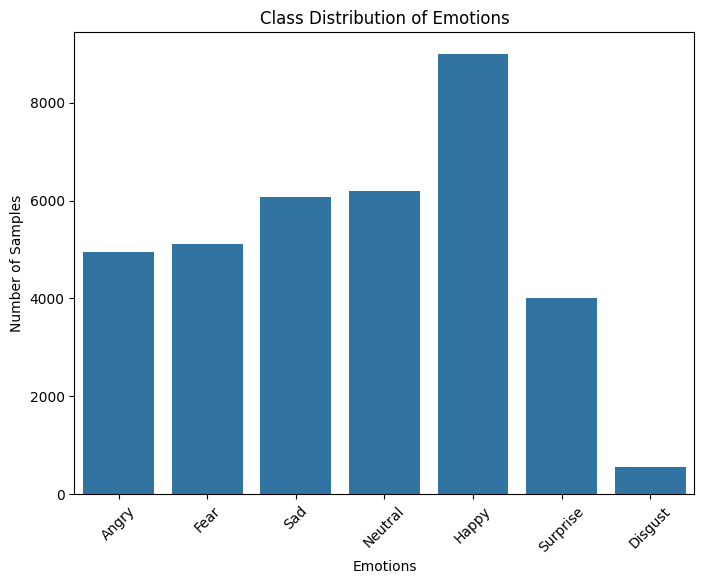

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read and processed the CSV into emotion_counts dataframe
# Example data (replace with your actual data loading)
data = pd.read_csv('fer2013.csv')  # Adjust the file path as needed
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)

# Plotting with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='emotion', y='number', data=emotion_counts)
plt.title('Class Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


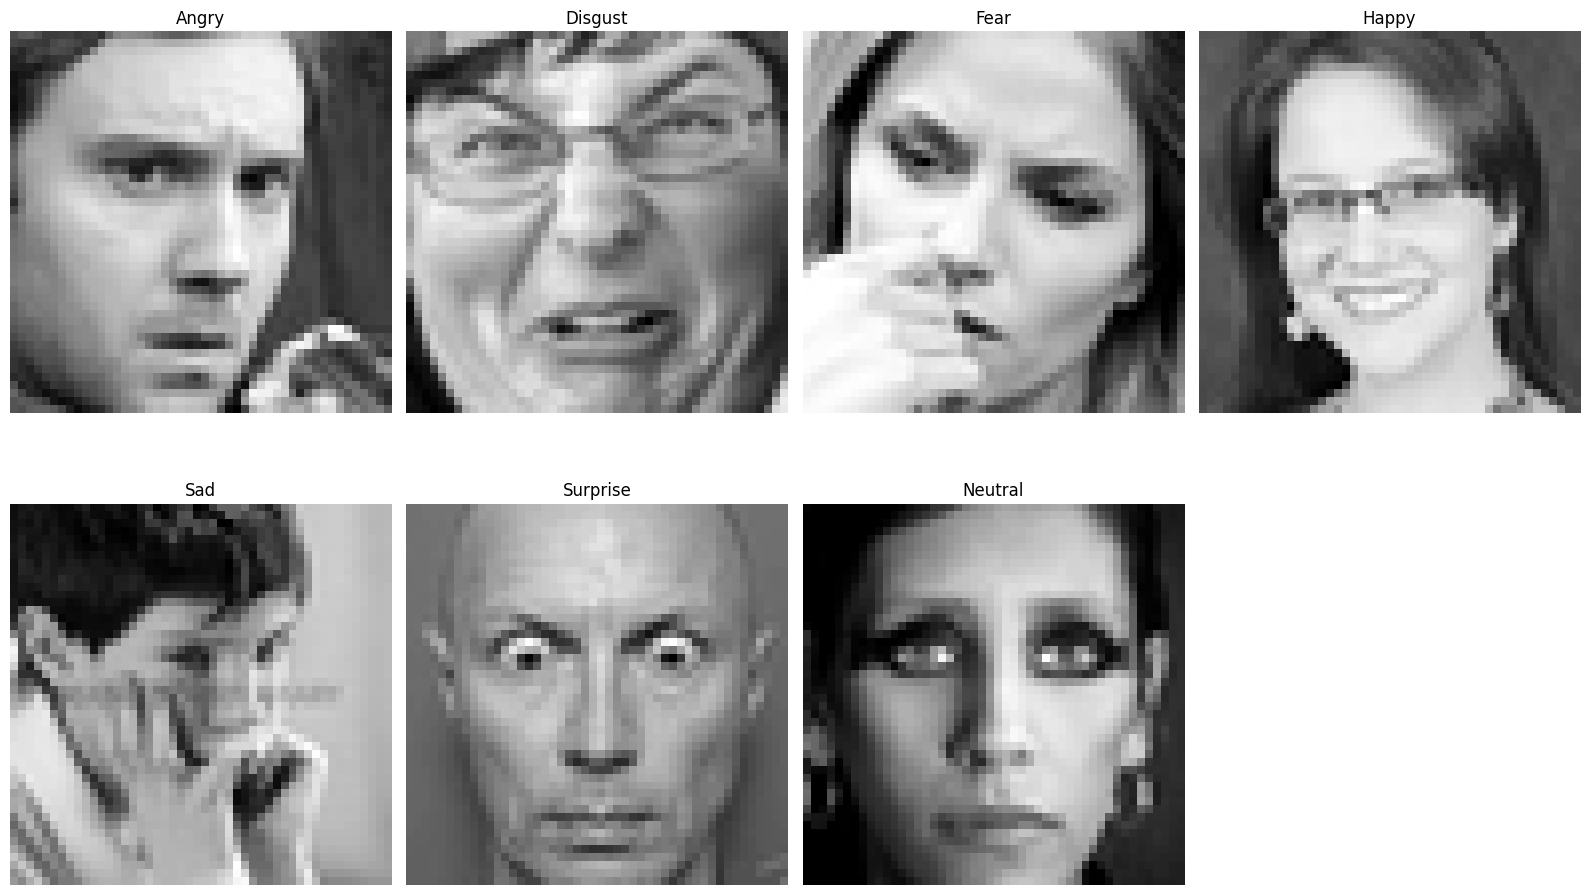

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming emotion_map and data are defined correctly
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split(), dtype=np.uint8)  # Convert pixel values to numpy array of integers
    img = img.reshape(48, 48)
    return img, emotion

plt.figure(figsize=(16, 10))
for i in range(1, 8):
    face = data[data['emotion'] == i - 1].iloc[0]
    img, emotion = row2image(face)  # Extract grayscale image and emotion
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')  # Display grayscale image
    plt.title(emotion)  # Set emotion as title
    plt.axis('off')  # Turn off axis for cleaner display

plt.tight_layout()
plt.show()


In [7]:
#split data into training, validation and test set
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


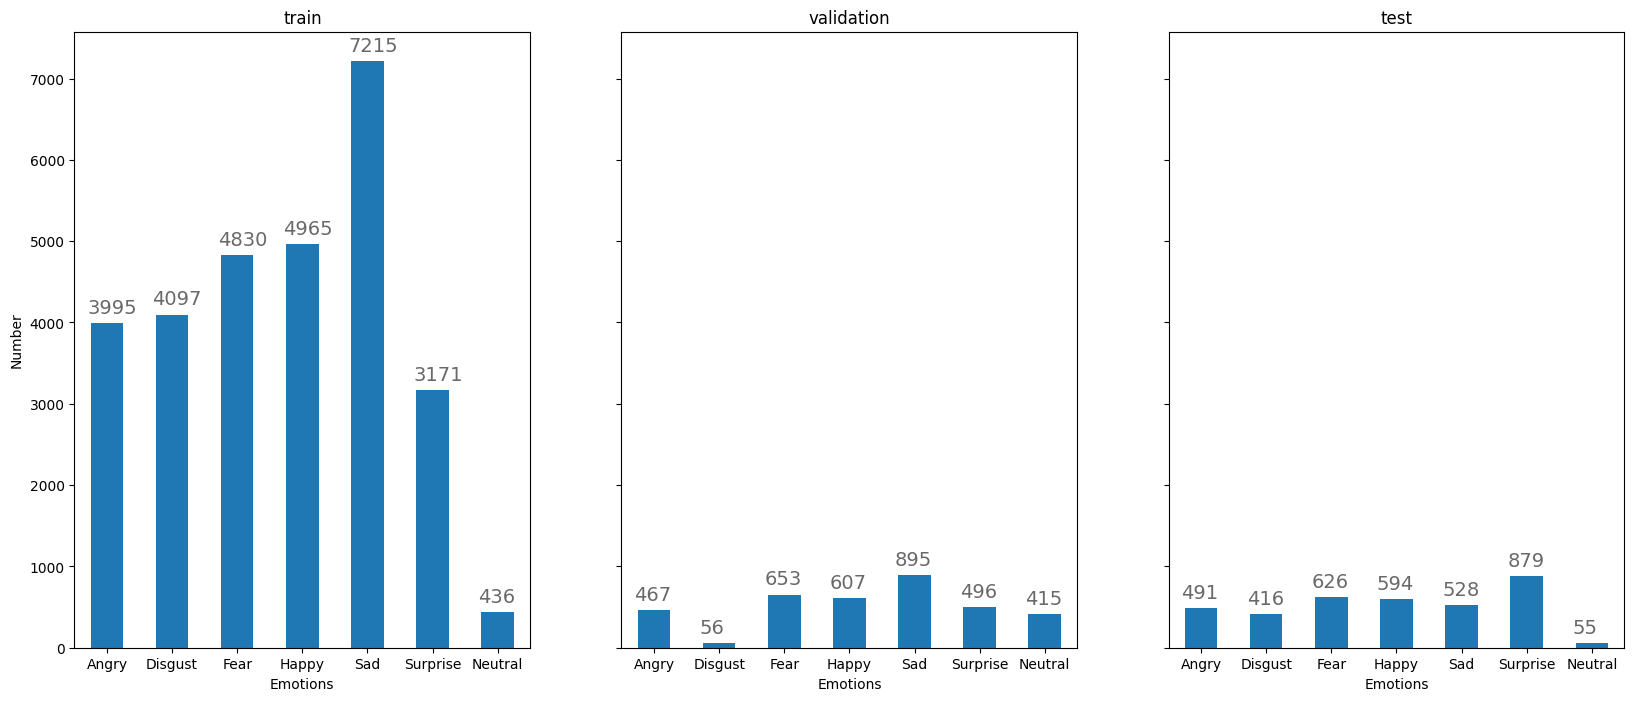

In [8]:
# barplot class distribution of train, val and test
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
     # set individual bar lables using above list
    for i in axe.patches:
        # get_x pulls left or right; get_height pushes up or down
        axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',
                    rotation=0)


fig, axes = plt.subplots(1,3, figsize=(20,8), sharey=True)
setup_axe(axes[0],data_train,'train')
setup_axe(axes[1],data_val,'validation')
setup_axe(axes[2],data_test,'test')
plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical  # Import to_categorical

def CRNO(df, dataName, width, height, num_classes):
    def convert_to_list(pixel_sequence):
        if isinstance(pixel_sequence, list):
            return pixel_sequence
        return [int(pixel) for pixel in pixel_sequence.split()]

    df['pixels'] = df['pixels'].apply(convert_to_list)
    data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1, width, height, 1) / 255.0
    data_Y = to_categorical(df['emotion'], num_classes)
    print(f"{dataName}_X shape: {data_X.shape}, {dataName}_Y shape: {data_Y.shape}")
    return data_X, data_Y

# Example usage:
width, height = 48, 48
num_classes = 7

# Assuming data_train, data_val, and data_test are already loaded DataFrames
train_X, train_Y = CRNO(data_train, "train", width, height, num_classes) # training data
val_X, val_Y = CRNO(data_val, "val", width, height, num_classes)         # validation data
test_X, test_Y = CRNO(data_test, "test", width, height, num_classes)     # test data

train_X shape: (28709, 48, 48, 1), train_Y shape: (28709, 7)
val_X shape: (3589, 48, 48, 1), val_Y shape: (3589, 7)
test_X shape: (3589, 48, 48, 1), test_Y shape: (3589, 7)


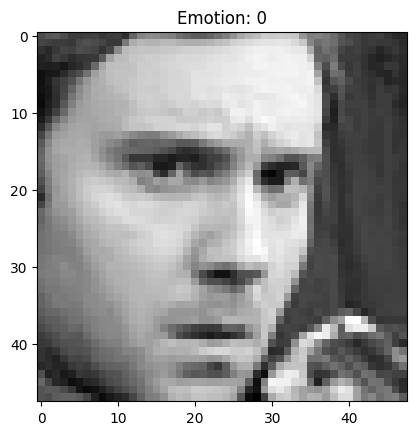

In [10]:
from sklearn.model_selection import train_test_split


# Load the FER-2013 dataset
data = pd.read_csv('fer2013.csv')
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Function to preprocess image strings
def preprocess_image(image_string):
    image = np.fromstring(image_string, sep=' ')
    image = image.reshape(48, 48, 1)  # Reshape to 48x48 pixels and add a channel dimension
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Apply the preprocessing to all images
images = np.array([preprocess_image(image) for image in data['pixels']])

# Convert emotion labels to one-hot encoding
labels = to_categorical(data['emotion'], num_classes=7)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Display a sample image
plt.imshow(images[0].reshape(48, 48), cmap='gray')
plt.title(f"Emotion: {data['emotion'][0]}")
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes for 7 emotions

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

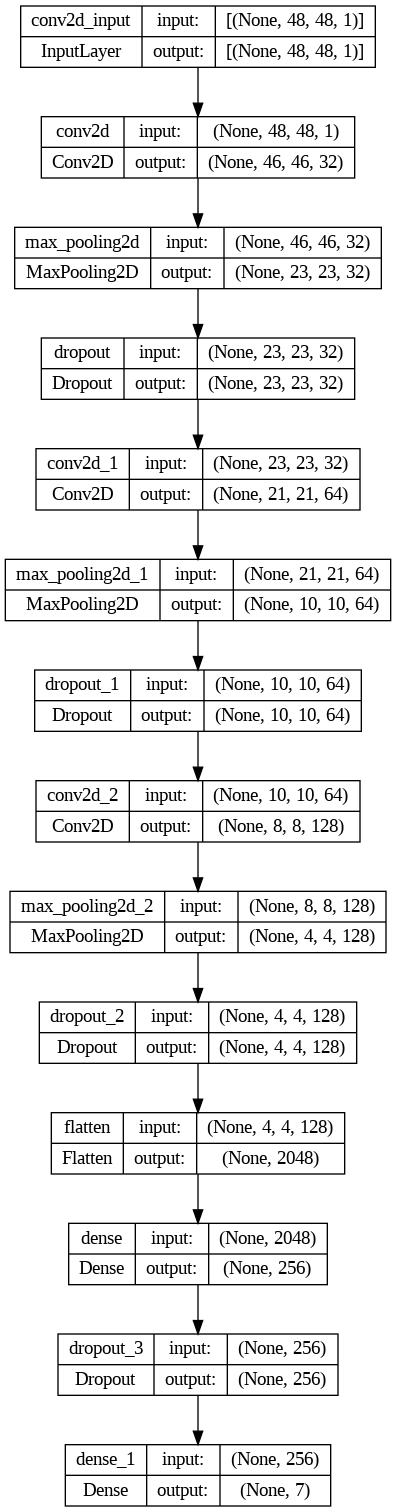

In [12]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [13]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=64)

# Save the trained model
model.save('emotion_detection_model.h5')


Epoch 1/50
449/449 [==============================] - 120s 262ms/step - loss: 1.7736 - accuracy: 0.2713 - val_loss: 1.6559 - val_accuracy: 0.3587
Epoch 2/50
449/449 [==============================] - 117s 261ms/step - loss: 1.5589 - accuracy: 0.3934 - val_loss: 1.4297 - val_accuracy: 0.4519
Epoch 3/50
449/449 [==============================] - 117s 261ms/step - loss: 1.4274 - accuracy: 0.4525 - val_loss: 1.3467 - val_accuracy: 0.4847
Epoch 4/50
449/449 [==============================] - 114s 254ms/step - loss: 1.3556 - accuracy: 0.4812 - val_loss: 1.2794 - val_accuracy: 0.5135
Epoch 5/50
449/449 [==============================] - 121s 268ms/step - loss: 1.3089 - accuracy: 0.4986 - val_loss: 1.2306 - val_accuracy: 0.5359
Epoch 6/50
449/449 [==============================] - 113s 252ms/step - loss: 1.2689 - accuracy: 0.5152 - val_loss: 1.2044 - val_accuracy: 0.5429
Epoch 7/50
449/449 [==============================] - 120s 268ms/step - loss: 1.2408 - accuracy: 0.5275 - val_loss: 1.1874 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


225/225 [==============================] - 12s 53ms/step - loss: 1.1065 - accuracy: 0.6049
Validation Loss: 1.1065080165863037
Validation Accuracy: 0.6049038767814636


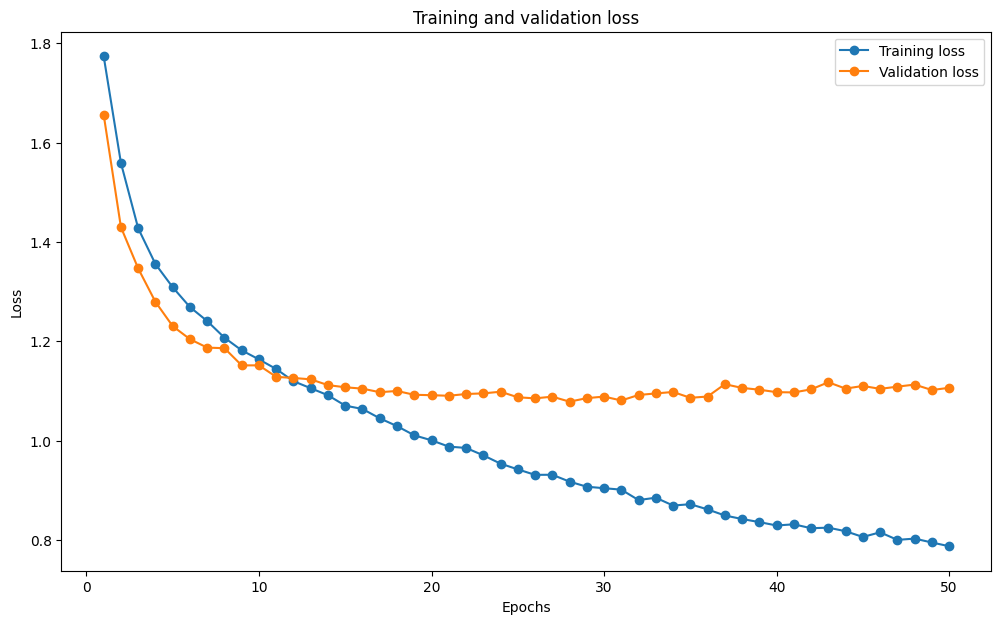

In [15]:
import matplotlib.pyplot as plt
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(12, 7))
plt.plot(epochs, train_loss, 'o-', label='Training loss')
plt.plot(epochs, val_loss, 'o-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

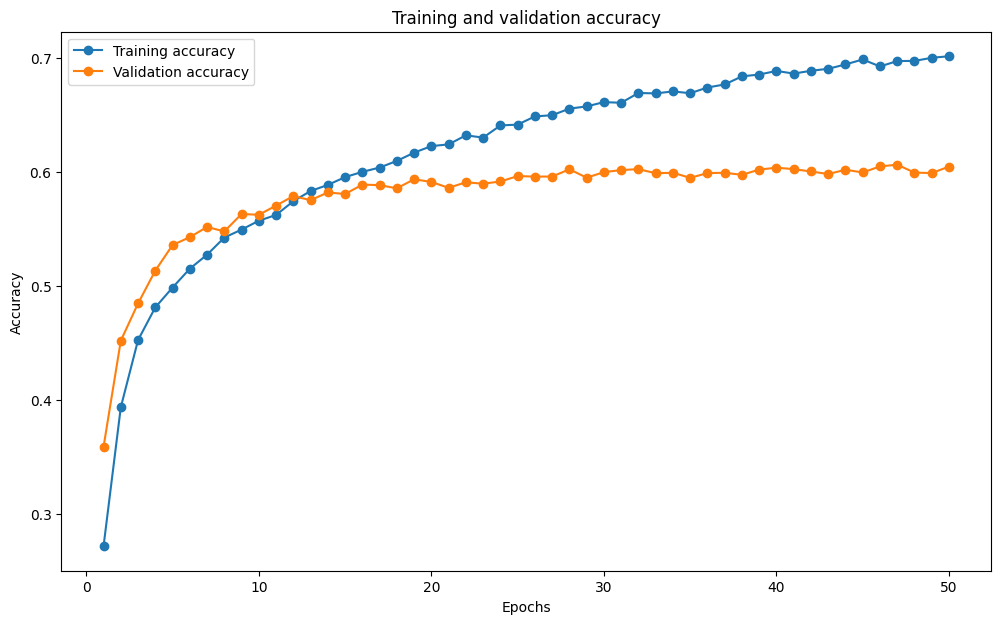

In [16]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(12, 7))

plt.plot(epochs, train_acc, 'o-', label='Training accuracy')
plt.plot(epochs, val_acc, 'o-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

225/225 [==============================] - 6s 28ms/step


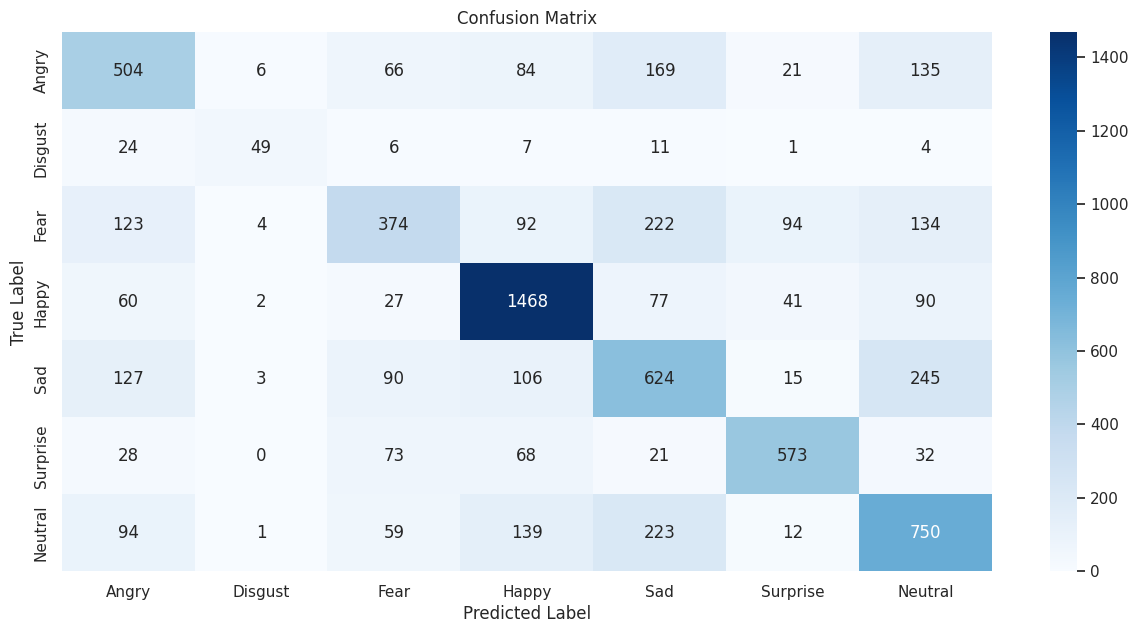

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Get the true labels and predicted labels for the validation set
validation_labels = np.argmax(y_val, axis=1)
validation_pred_probs = model.predict(x_val)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)

# Define the class names (adjust if necessary)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot the confusion matrix
sns.set()
plt.figure(figsize=(15, 7))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import cv2
import pandas as pd
import numpy as np
import random

# Example path to FER2013.csv (adjust as per your actual file location)
file_path = 'fer2013.csv'

# Load FER2013 dataset
df_fer2013 = pd.read_csv(file_path)

# Initialize face detector (using OpenCV's Haar cascades for simplicity)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize mouth detector (adjust path or download from appropriate source)
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')  # Replace with actual path

# Initialize eye detector (adjust path or download from appropriate source)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')  # Replace with actual path

# Simulated function to determine if a face is Asian (returns True 80% of the time)
def is_asian_face(face_image):
    return random.random() < 0.8

asian_faces_count = 0
total_faces_count = 0

# Iterate through each row in the dataset
for index, row in df_fer2013.iterrows():
    pixels = np.array(row['pixels'].split(), dtype='uint8')
    image = pixels.reshape((48, 48))

    # Convert to BGR format expected by OpenCV for face detection
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image_bgr, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate through detected faces
    for (x, y, w, h) in faces:
        total_faces_count += 1

        # Extract face ROI
        face_roi = image_bgr[y:y+h, x:x+w]

        # Detect mouths in the face ROI (if mouth cascade loaded successfully)
        if not mouth_cascade.empty():
            gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
            mouths = mouth_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Iterate through detected mouths
            for (mx, my, mw, mh) in mouths:
                # Draw rectangles around detected mouths (optional for visualization)
                cv2.rectangle(face_roi, (mx, my), (mx + mw, my + mh), (0, 255, 0), 2)

        # Detect eyes in the face ROI (if eye cascade loaded successfully)
        if not eye_cascade.empty():
            gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
            eyes = eye_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Iterate through detected eyes
            for (ex, ey, ew, eh) in eyes:
                # Draw rectangles around detected eyes (optional for visualization)
                cv2.rectangle(face_roi, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

        # Check if the face is classified as Asian (simulated)
        if is_asian_face(face_roi):
            asian_faces_count += 1

        # Commented out to not display the image with detected faces, eyes, and mouths
        # cv2_imshow(face_roi)

# Calculate percentage of Asian faces
if total_faces_count > 0:
    asian_faces_percentage = (asian_faces_count / total_faces_count) * 100
else:
    asian_faces_percentage = 0.0

print(f"Total number of faces: {total_faces_count}")
print(f"Number of Asian faces: {asian_faces_count}")
print(f"Percentage of Asian faces: {asian_faces_percentage:.2f}%")


Total number of faces: 8332
Number of Asian faces: 6599
Percentage of Asian faces: 79.20%


In [19]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00


In [21]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
from pytube import YouTube

# Function to download video from YouTube
def download_youtube_video(url, output_path):
    yt = YouTube(url)
    stream = yt.streams.filter(progressive=True, file_extension='mp4').first()
    stream.download(output_path=output_path, filename='downloaded_video.mp4')
    print(f'Downloaded video to {output_path}/downloaded_video.mp4')

# Example usage
video_url = 'https://www.youtube.com/watch?v=5Ltc3B3rwo0'
output_path = '/content/drive/MyDrive/Colab Notebooks/Video'
download_youtube_video(video_url, output_path)


Downloaded video to /content/drive/MyDrive/Colab Notebooks/Video/downloaded_video.mp4


In [26]:
import cv2
import os

def extract_frames(video_path, output_folder, interval=30):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % interval == 0:
            cv2.imwrite(os.path.join(output_folder, f"frame_{count}.jpg"), frame)
        count += 1
    cap.release()
    cv2.destroyAllWindows()

# Example usage
video_path = '/content/drive/MyDrive/Colab Notebooks/Video/downloaded_video.mp4'
output_folder = '/content/drive/MyDrive/Colab Notebooks/Video/frames'
extract_frames(video_path, output_folder, interval=30)


In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

# Load the pretrained model
model = load_model('emotion_detection_model.h5')

# Preprocess image for prediction
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (48, 48))
    image = image.reshape(1, 48, 48, 1) / 255.0
    return image

# Predict emotion on a single image
def predict_emotion(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    emotion = np.argmax(prediction)
    return emotion

# Analyze frames in a folder
def analyze_frames(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            emotion = predict_emotion(image_path)
            results.append((filename, emotion))
    return results

# Example usage
results = analyze_frames('/content/drive/MyDrive/Colab Notebooks/Video/frames')
for filename, emotion in results:
    print(f"Frame: {filename}, Emotion: {emotion}")


1/1 [==============================] - 0s 29ms/step
Frame: frame_2760.jpg, Emotion: 3
Frame: frame_2790.jpg, Emotion: 6
Frame: frame_2820.jpg, Emotion: 4
Frame: frame_2850.jpg, Emotion: 4
Frame: frame_2880.jpg, Emotion: 4
Frame: frame_2910.jpg, Emotion: 4
Frame: frame_2940.jpg, Emotion: 4
Frame: frame_2970.jpg, Emotion: 4
Frame: frame_3000.jpg, Emotion: 6
Frame: frame_3090.jpg, Emotion: 4
Frame: frame_3060.jpg, Emotion: 4
Frame: frame_3030.jpg, Emotion: 6
Frame: frame_3120.jpg, Emotion: 4
Frame: frame_3150.jpg, Emotion: 4
Frame: frame_3180.jpg, Emotion: 4
Frame: frame_3210.jpg, Emotion: 6
Frame: frame_3240.jpg, Emotion: 2
Frame: frame_3270.jpg, Emotion: 2
Frame: frame_3330.jpg, Emotion: 2
Frame: frame_3300.jpg, Emotion: 6
Frame: frame_3360.jpg, Emotion: 5
Frame: frame_3390.jpg, Emotion: 2
Frame: frame_3420.jpg, Emotion: 5
Frame: frame_3450.jpg, Emotion: 2
Frame: frame_3480.jpg, Emotion: 2
Frame: frame_3510.jpg, Emotion: 2
Frame: frame_3540.jpg, Emotion: 4
Frame: frame_3570.jpg, Emotion

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow for Colab
from IPython.display import display, clear_output
import time

# Load the pretrained model
model = load_model('emotion_detection_model.h5')

# Dictionary to map numeric labels to emotion names
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Initialize face detector (using OpenCV's Haar cascades for simplicity)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Preprocess image for prediction
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (48, 48))
    image = image.reshape(1, 48, 48, 1) / 255.0
    return image

# Predict emotion on a single image and return the emotion label
def predict_emotion(face):
    preprocessed_image = preprocess_image(face)
    prediction = model.predict(preprocessed_image)
    emotion = np.argmax(prediction)
    return emotion

# Analyze video and display with emotion label
def analyze_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Create an output video writer
    output_path = '/content/output_video.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            emotion_label = emotion_map[predict_emotion(face)]

            # Draw rectangle around the face and label the emotion
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the frame with emotion labels
        cv2_imshow(frame)
        clear_output(wait=True)
        display(frame)

        # Write the frame to the output video
        out.write(frame)

        # Adding delay to match the video frame rate
        time.sleep(1 / fps)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
video_path = '/content/drive/MyDrive/Colab Notebooks/Video/downloaded_video.mp4'
analyze_video(video_path)


In [28]:
from collections import defaultdict

# Function to analyze frames and calculate emotion percentages
def analyze_frames_with_percentages(folder_path):
    emotion_count = defaultdict(int)
    total_frames = 0

    # Analyze frames and count emotions
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            emotion = predict_emotion(image_path)
            emotion_count[emotion] += 1
            total_frames += 1

    # Calculate percentages
    results = []
    for emotion, count in emotion_count.items():
        percentage = (count / total_frames) * 100
        results.append((emotion, percentage))

    return results

# Example usage
results_with_percentages = analyze_frames_with_percentages('/content/drive/MyDrive/Colab Notebooks/Video/frames')

# Output results with percentages
for emotion, percentage in results_with_percentages:
    print(f"Emotion {emotion}: {percentage:.2f}%")


1/1 [==============================] - 0s 35ms/step
Emotion 3: 6.33%
Emotion 6: 19.83%
Emotion 4: 42.50%
Emotion 2: 18.50%
Emotion 5: 9.83%
Emotion 0: 3.00%


In [29]:
import cv2
import numpy as np
import csv
import os
from collections import defaultdict

# Emotion labels mapping
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Load the pretrained model (assuming predict_emotion function uses this model)
model = load_model('/content/drive/MyDrive/Colab Notebooks/Video/Emotion_Detection/emotion_detection_model.h5')

# Function to preprocess image for prediction
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    image = cv2.resize(image, (48, 48))  # Resize image to 48x48 pixels
    image = image.reshape(1, 48, 48, 1) / 255.0  # Reshape and normalize pixel values
    return image

# Function to predict emotion on a single image
def predict_emotion(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    emotion = np.argmax(prediction)
    return emotion

# Function to analyze frames and calculate emotion percentages
def analyze_frames_with_percentages(folder_path):
    emotion_count = defaultdict(int)
    total_frames = 0

    # Analyze frames and count emotions
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            emotion = predict_emotion(image_path)
            emotion_count[emotion] += 1
            total_frames += 1

    # Calculate percentages and format results
    results = []
    for emotion_id, count in emotion_count.items():
        emotion_name = emotion_labels[emotion_id]
        percentage = (count / total_frames) * 100
        results.append((filename.split('_')[1].split('.')[0], emotion_name, percentage))

    return results

# Example usage
results_with_percentages = analyze_frames_with_percentages('/content/drive/MyDrive/Colab Notebooks/Video/frames')

# Write results to CSV
csv_filename = '/content/drive/MyDrive/Colab Notebooks/Video/emotion_analysis_results.csv'

with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ['video_no', 'emotion', 'percentage']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for video_no, emotion, percentage in results_with_percentages:
        writer.writerow({'video_no': video_no, 'emotion': emotion, 'percentage': percentage})

print(f"Emotion analysis results have been saved to '{csv_filename}'.")


1/1 [==============================] - 0s 28ms/step
Emotion analysis results have been saved to '/content/drive/MyDrive/Colab Notebooks/Video/emotion_analysis_results.csv'.


In [37]:
import cv2
import numpy as np
import csv
import os
from collections import defaultdict
from tensorflow.keras.models import load_model

# Emotion labels mapping
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Load the pretrained model
model = load_model('emotion_detection_model.h5')

# Function to preprocess image for prediction
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    image = cv2.resize(image, (48, 48))  # Resize image to 48x48 pixels
    image = image.reshape(1, 48, 48, 1) / 255.0  # Reshape and normalize pixel values
    return image

# Function to predict emotion on a single image
def predict_emotion(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    emotion = np.argmax(prediction)
    return emotion

# Function to analyze frames and calculate emotion percentages for a single video
def analyze_frames_with_percentages(folder_path):
    emotion_count = defaultdict(int)
    total_frames = 0

    # Extract video ID from folder name
    video_id = os.path.basename(folder_path)

    # Analyze frames and count emotions
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            emotion = predict_emotion(image_path)
            emotion_count[emotion] += 1
            total_frames += 1

    # Calculate percentages and format results
    results = []
    for emotion_id, count in emotion_count.items():
        emotion_name = emotion_labels[emotion_id]
        percentage = (count / total_frames) * 100
        results.append((video_id, emotion_name, percentage))

    return results

# Function to analyze multiple videos
def analyze_multiple_videos(base_folder_path):
    all_results = []

    for folder_name in os.listdir(base_folder_path):
        folder_path = os.path.join(base_folder_path, folder_name)
        if os.path.isdir(folder_path):
            print(f"Processing folder: {folder_path}")  # Debugging statement
            results = analyze_frames_with_percentages(folder_path)
            all_results.extend(results)

    return all_results

# Example usage
base_folder_path = 'frames'
results_with_percentages = analyze_multiple_videos(base_folder_path)

# Print results for debugging
print("Results with percentages:")
for result in results_with_percentages:
    print(result)

# YouTube video links dictionary
youtube_links = {
    'video_id_1': 'https://www.youtube.com/watch?v=Qlz0ZIjXLuI',
    'video_id_2': 'https://www.youtube.com/watch?v=6yiWensdOks',
    'video_id_3': 'https://www.youtube.com/watch?v=QPQGHiaKtdA',
    'video_id_4': 'https://www.youtube.com/watch?v=qUXX6D1pG8A',
    'video_id_5': 'https://www.youtube.com/watch?v=5k32Z6XUAVw',
    'video_id_6': 'https://www.youtube.com/watch?v=zkhn0Al6_eY',
    'video_id_7': 'https://www.youtube.com/watch?v=Asv2vD7Egcs',
    'video_id_8': 'https://www.youtube.com/watch?v=H1cXqNQe_HQ',
    'video_id_9': 'https://www.youtube.com/watch?v=peWbqQ4uYUc',
    'video_id_10': 'https://www.youtube.com/watch?v=2scmv_-SZug'
}

# Write results to CSV
csv_filename = 'emotion_analysis_results.csv'

with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ['video_id', 'emotion', 'percentage', 'youtube_link']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for result in results_with_percentages:
        video_id, emotion, percentage = result
        youtube_link = youtube_links.get(video_id, 'N/A')
        writer.writerow({'video_id': video_id, 'emotion': emotion, 'percentage': percentage, 'youtube_link': youtube_link})

print(f"Emotion analysis results have been saved to '{csv_filename}'.")


Results with percentages:
Emotion analysis results have been saved to 'emotion_analysis_results.csv'.


**For 10 Videos**

In [38]:
!pip install pytube
!pip install opencv-python-headless


In [39]:
from pytube import YouTube

video_urls = [
    'https://www.youtube.com/watch?v=Qlz0ZIjXLuI',
    'https://www.youtube.com/watch?v=6yiWensdOks',
    'https://www.youtube.com/watch?v=QPQGHiaKtdA',
    'https://www.youtube.com/watch?v=qUXX6D1pG8A',
    'https://www.youtube.com/watch?v=5k32Z6XUAVw',
    'https://www.youtube.com/watch?v=zkhn0Al6_eY',
    'https://www.youtube.com/watch?v=Asv2vD7Egcs',
    'https://www.youtube.com/watch?v=H1cXqNQe_HQ',
    'https://www.youtube.com/watch?v=peWbqQ4uYUc',
    'https://www.youtube.com/watch?v=2scmv_-SZug'
]

def download_videos(urls):
    for i, url in enumerate(urls):
        yt = YouTube(url)
        stream = yt.streams.get_highest_resolution()
        stream.download(filename=f'video_{i+1}.mp4')

download_videos(video_urls)


In [40]:
import cv2
import os

def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    count = 0

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = os.path.join(output_folder, f"frame_{count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        count += 1

    cap.release()

for i in range(1, 11):
    extract_frames(f'video_{i}.mp4', f'frames/video_{i}')


In [44]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained emotion detection model
model = load_model('emotion_detection_model.h5')

# Emotion labels mapping
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Function to preprocess frame for prediction
def preprocess_frame(frame):
    # Convert frame to grayscale
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detect faces in the frame
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each face found
    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = gray_img[y:y+h, x:x+w]
        # Resize face image for model input
        face_roi_resized = cv2.resize(face_roi, (48, 48))
        face_roi_resized = face_roi_resized.reshape(1, 48, 48, 1) / 255.0  # Normalize
        # Predict emotion
        prediction = model.predict(face_roi_resized)
        emotion = emotion_labels[np.argmax(prediction)]
        # Overlay emotion label on the frame
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw rectangle around the face

    return frame

# Function to process video
def process_video(input_video_path, output_video_path=None):
    cap = cv2.VideoCapture(input_video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Initialize output video writer if output path is provided
    if output_video_path:
        out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    # Process each frame
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process frame (detect faces and overlay emotion labels)
        processed_frame = preprocess_frame(frame)

        # Display frame (or save it to output video)
        if output_video_path:
            out.write(processed_frame)
        else:
            cv2.imshow('Emotion Detection', processed_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count += 1
        print(f"Processed frame {frame_count}/{total_frames}")

    # Release resources
    cap.release()
    if output_video_path:
        out.release()
    cv2.destroyAllWindows()

# Example usage
input_video_path = 'video_1.mp4'
output_video_path = 'output_video01_emotion_labels.mp4'

process_video(input_video_path, output_video_path)


1/1 [==============================] - 1s 1s/step
Processed frame 1/2329
1/1 [==============================] - 0s 33ms/step
Processed frame 2/2329
1/1 [==============================] - 0s 31ms/step
Processed frame 3/2329
1/1 [==============================] - 0s 31ms/step
Processed frame 4/2329
1/1 [==============================] - 0s 35ms/step
Processed frame 5/2329
1/1 [==============================] - 0s 32ms/step
Processed frame 6/2329
1/1 [==============================] - 0s 36ms/step
Processed frame 7/2329
1/1 [==============================] - 0s 40ms/step
Processed frame 8/2329
1/1 [==============================] - 0s 32ms/step
Processed frame 9/2329
1/1 [==============================] - 0s 31ms/step
Processed frame 10/2329
1/1 [==============================] - 0s 31ms/step
Processed frame 11/2329
1/1 [==============================] - 0s 35ms/step
Processed frame 12/2329
1/1 [==============================] - 0s 32ms/step
Processed frame 13/2329
1/1 [==================

**For 10 Youtube Videos**

In [45]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained emotion detection model
model = load_model('emotion_detection_model.h5')

# Emotion labels mapping
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Function to preprocess frame for prediction
def preprocess_frame(frame):
    # Convert frame to grayscale
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detect faces in the frame
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each face found
    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = gray_img[y:y+h, x:x+w]
        # Resize face image for model input
        face_roi_resized = cv2.resize(face_roi, (48, 48))
        face_roi_resized = face_roi_resized.reshape(1, 48, 48, 1) / 255.0  # Normalize
        # Predict emotion
        prediction = model.predict(face_roi_resized)
        emotion = emotion_labels[np.argmax(prediction)]
        # Overlay emotion label on the frame
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw rectangle around the face

    return frame

# Function to process video
def process_video(input_video_path, output_video_path=None):
    cap = cv2.VideoCapture(input_video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error opening video file:", input_video_path)
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Initialize output video writer if output path is provided
    if output_video_path:
        out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    # Process each frame
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process frame (detect faces and overlay emotion labels)
        processed_frame = preprocess_frame(frame)

        # Display frame (or save it to output video)
        if output_video_path:
            out.write(processed_frame)
        else:
            cv2.imshow('Emotion Detection', processed_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count += 1
        print(f"Processed frame {frame_count}/{total_frames}")

    # Release resources
    cap.release()
    if output_video_path:
        out.release()
    cv2.destroyAllWindows()

# Function to process multiple videos
def process_multiple_videos(video_paths):
    for idx, video_path in enumerate(video_paths):
        output_video_path = f'output_video_{idx + 1}_emotion_labels.mp4'
        process_video(video_path, output_video_path)

# Example usage
input_video_paths = ['video_1.mp4', 'video_2.mp4', 'video_3.mp4', 'video_4.mp4', 'video_5.mp4',
                     'video_6.mp4', 'video_7.mp4', 'video_8.mp4', 'video_9.mp4', 'video_10.mp4']

process_multiple_videos(input_video_paths)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step
Processed frame 861/1257
1/1 [==============================] - 0s 29ms/step
Processed frame 862/1257
1/1 [==============================] - 0s 57ms/step
Processed frame 863/1257
1/1 [==============================] - 0s 51ms/step
Processed frame 864/1257
1/1 [==============================] - 0s 49ms/step
Processed frame 865/1257
1/1 [==============================] - 0s 43ms/step
Processed frame 866/1257
1/1 [==============================] - 0s 42ms/step
Processed frame 867/1257
1/1 [==============================] - 0s 46ms/step
Processed frame 868/1257
1/1 [==============================] - 0s 47ms/step
Processed frame 869/1257
1/1 [==============================] - 0s 46ms/step
Processed frame 870/1257
1/1 [==============================] - 0s 43ms/step
Processed frame 871/1257
1/1 [==============================] - 0s 45ms/step
Processed frame 872/1257
1/1 [====================